## Lab Data Transformation


### Challenge 1

Use the file Data_Marketing_Customer_Analysis_Round3.csv

- Check if there are highly correlated features and drop them (if there are any).
- One Hot Encoding of the categorical nominal variables, Ordinal Encoding of the categorical ordinal variables.


### Challenge 2

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA

- Use minmax transform to bring varA's values into the range [0,1].
- Check that varA has been rescaled using a displot or a histogram


varB

- Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


Hints:

1. Import transformers from the sklearn library from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
- To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)
- To rescale the column, use the MinMaxScaler transform.

2. Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset from an csv file

df = pd.read_csv('marketing_customer_analysis_clean.csv')
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [3]:
# Summary for numerical variables

df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [4]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [5]:
df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [6]:
# Calculate the correlation matrix for numerical variables
num_columns = df.select_dtypes(include=[np.number])
corr_matrix = num_columns.corr()
corr_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


<Axes: >

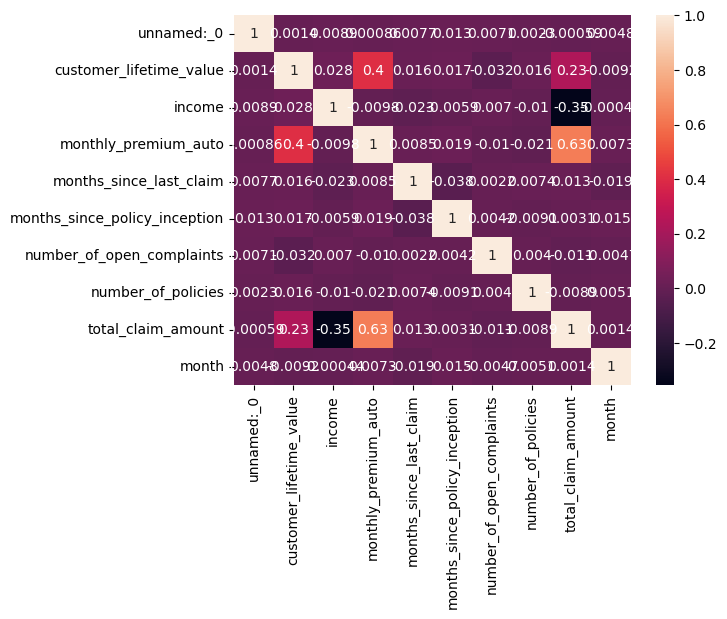

In [7]:
# Plot a heatmap for numerical variables
sns.heatmap(corr_matrix, annot=True)

In [8]:
# Summary for categorical variables 'object'

categ_columns = df.select_dtypes(include=['O'])
categ_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [9]:
# all categorical columns
categ_columns.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [10]:
# categorical nominal variables
categ_nom_columns = ['customer', 'state', 'response','effective_to_date', 'employmentstatus', 'gender', 'location_code', 
            'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel',  'vehicle_class', 'vehicle_type']

In [11]:
# categorical ordinal variables
categ_ord_columns = ['coverage', 'education', 'vehicle_size']

### One Hot Encoding:

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoded_data = pd.get_dummies(categ_columns)
encoded_data = encoded_data.astype(int)
encoded_data

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
10906,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
10907,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
10908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


### Ordinal Encoding:

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [34]:
enc = OrdinalEncoder(categories = [['Basic', 'Extended', 'Premium']])
enc.fit(df[['coverage']])
enc.transform(df[['coverage']])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [2.],
       [0.]])

In [35]:
df['education'].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [36]:
enc = OrdinalEncoder(categories = [['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master']])
enc.fit(df[['education']])
enc.transform(df[['education']])

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [37]:
df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [40]:
enc = OrdinalEncoder(categories = [['Small','Medsize','Large']])
enc.fit(df[['vehicle_size']])
enc.transform(df[['vehicle_size']])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [41]:
df.dropna(inplace=True)

In [42]:
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,varA,varB
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,1.091000e+04
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728,0.375434,-3.710974e-15
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915,0.303650,1.000046e+00
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,0.000000,-2.240385e+00
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000,0.000000,-6.595695e-01
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000,0.338199,-2.936253e-02
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000,0.622626,6.403629e-01
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000,1.000000,2.805714e+00


## Challenge 2

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

array([[<Axes: title={'center': 'unnamed:_0'}>,
        <Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>],
       [<Axes: title={'center': 'number_of_open_complaints'}>,
        <Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'varA'}>,
        <Axes: title={'center': 'varB'}>]], dtype=object)

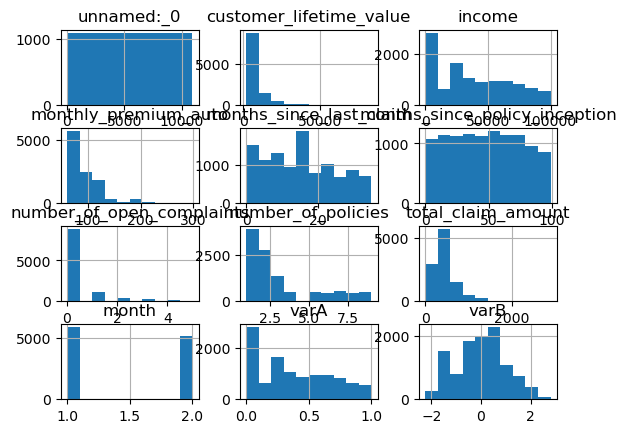

In [48]:
numericals = df.select_dtypes(include= 'number')
numericals.hist()

<Axes: ylabel='Count'>

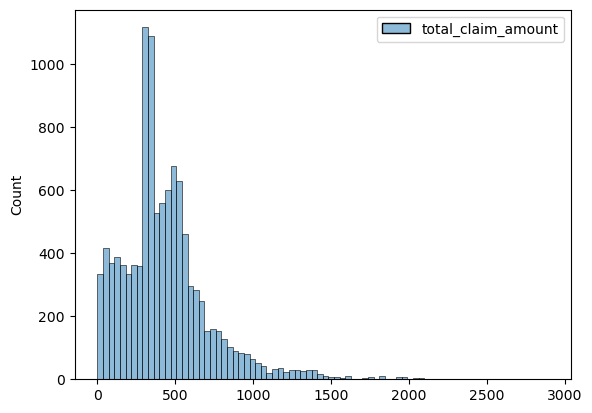

In [51]:
### varA

varA = df[['total_claim_amount']]

sns.histplot(data=varA, bins=80) 

In [49]:
scaler = MinMaxScaler()

In [52]:
# Use minmax transform to bring varA's values into the range [0,1].
df['varA'] = scaler.fit_transform(df[['total_claim_amount']])

In [53]:
varA = df[['varA']] 
varA_scaled = scaler.fit_transform(varA)
df['varA'] = varA_scaled

In [54]:
varA

,varA
0,0.101171
1,0.257445
2,0.165875
3,0.167263
4,0.244657
...,...
10905,0.419717
10906,0.094333
10907,0.131763
10908,0.213674


<Axes: xlabel='varA', ylabel='Count'>

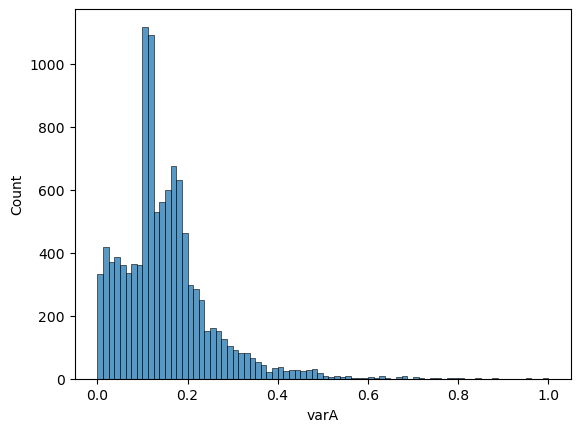

In [55]:
# Check that varA has been rescaled using a displot or a histogram
sns.histplot(df['varA'], bins=80) 

<Axes: ylabel='Count'>

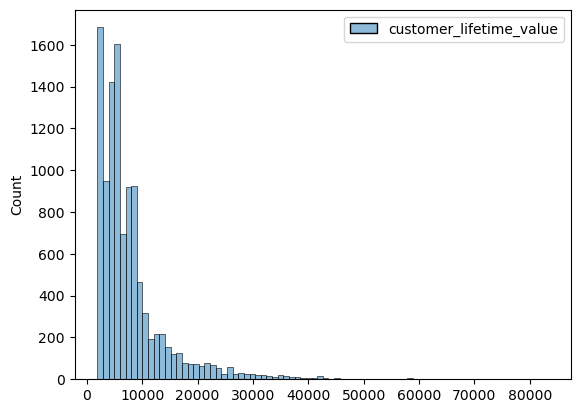

In [56]:
### varB

varB = df[['customer_lifetime_value']]

sns.histplot(data=varB, bins=80) 

In [57]:
# Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.

pt = PowerTransformer()
varB = df[['customer_lifetime_value']]
varB_transformed = pt.fit_transform(varB)
df['varB'] = varB_transformed


<Axes: xlabel='varB', ylabel='Count'>

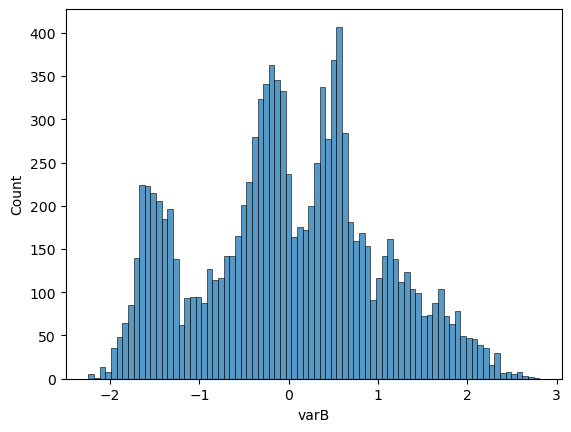

In [58]:
sns.histplot(df['varB'], bins=80) 

In [63]:
df[['varB']].describe()

,varB
count,1.091000e+04
mean,-3.710974e-15
std,1.000046e+00
min,-2.240385e+00
25%,-6.595695e-01
50%,-2.936253e-02
75%,6.403629e-01
max,2.805714e+00


In [27]:
#### not getting the expected results :(
#### waiting for the lab review